In [ ]:
ans 1

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

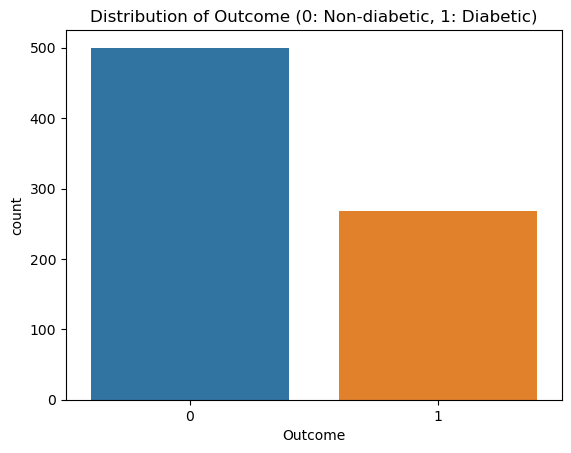

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://drive.google.com/uc?id=1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2"
df = pd.read_csv(url)

# Examine the first few rows of the dataset
print(df.head())

# Get summary statistics for numerical variables
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of the 'Outcome' variable
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Outcome (0: Non-diabetic, 1: Diabetic)")
plt.show()

# Visualize relationships between variables
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()

In [ ]:
ans 2

Before creating a decision tree model, it's essential to preprocess the data. This involves handling missing values, removing outliers (if necessary), and encoding categorical variables. In your dataset, there aren't any categorical variables, but you should handle missing values and outliers.

Here's how you can preprocess the data:

Handling Missing Values:

You need to decide how to handle the missing values in the dataset. Common approaches include:

a. Removing rows with missing values (not recommended if you have limited data).
b. Imputing missing values with the mean, median, or a statistical method.

In this case, I'll impute missing values using the median for numerical variables.

In [8]:
# Impute missing values with the median
df.fillna(df.median(), inplace=True)


Outlier Detection and Removal (Optional):

Outliers can significantly impact decision tree models. You can use statistical methods or visualization to detect outliers and decide whether to remove them. One way to visualize outliers is by creating box plots for numerical variables.



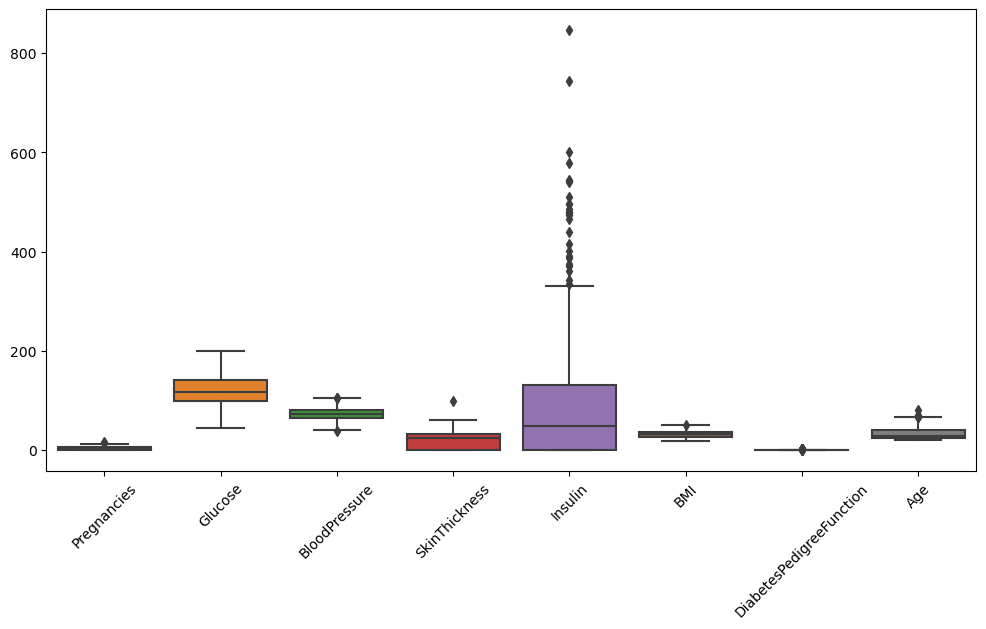

In [9]:
# Create box plots to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop('Outcome', axis=1))
plt.xticks(rotation=45)
plt.show()


If you choose to remove outliers, you can use methods like the IQR (Interquartile Range) method or z-scores.



In [10]:
# Define a function to remove outliers based on the IQR method
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from specific columns (e.g., Glucose, BloodPressure, BMI)
columns_to_clean = ['Glucose', 'BloodPressure', 'BMI']
for column in columns_to_clean:
    df = remove_outliers(df, column)

In [ ]:
ans 3

In [11]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

# Split the dataset into a training set (70%) and a test set (30%)
# Use a random seed (e.g., 42) for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the resulting datasets
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Test set shape (X, y):", X_test.shape, y_test.shape)

Training set shape (X, y): (492, 8) (492,)
Test set shape (X, y): (211, 8) (211,)


In [ ]:
ans 4

In [12]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Create a decision tree classifier
decision_tree = DecisionTreeClassifier()

# Perform cross-validation to optimize hyperparameters
# You can vary hyperparameters such as max_depth, min_samples_split, and min_samples_leaf
# Cross-validation helps in tuning hyperparameters and avoiding overfitting
# For example, let's vary the max_depth parameter from 1 to 10
max_depth_values = range(1, 11)
cv_scores = []

for max_depth in max_depth_values:
    decision_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(decision_tree, X_train, y_train, cv=5)  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Find the best max_depth value with the highest cross-validation score
best_max_depth = max_depth_values[cv_scores.index(max(cv_scores))]

# Train the decision tree model on the training set with the best hyperparameter
final_decision_tree = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
final_decision_tree.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = final_decision_tree.score(X_test, y_test)
print(f"Best Max Depth: {best_max_depth}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Best Max Depth: 5
Test Accuracy: 0.73


In [ ]:
ans 5

Accuracy: 0.73
Precision: 0.66
Recall: 0.47
F1 Score: 0.55
Confusion Matrix:
[[119  18]
 [ 39  35]]


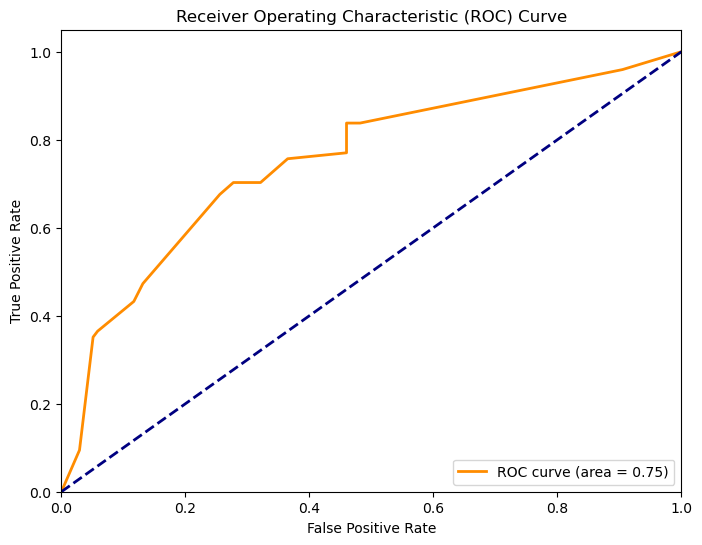

In [13]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = final_decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot a ROC curve
y_scores = final_decision_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
ans 6

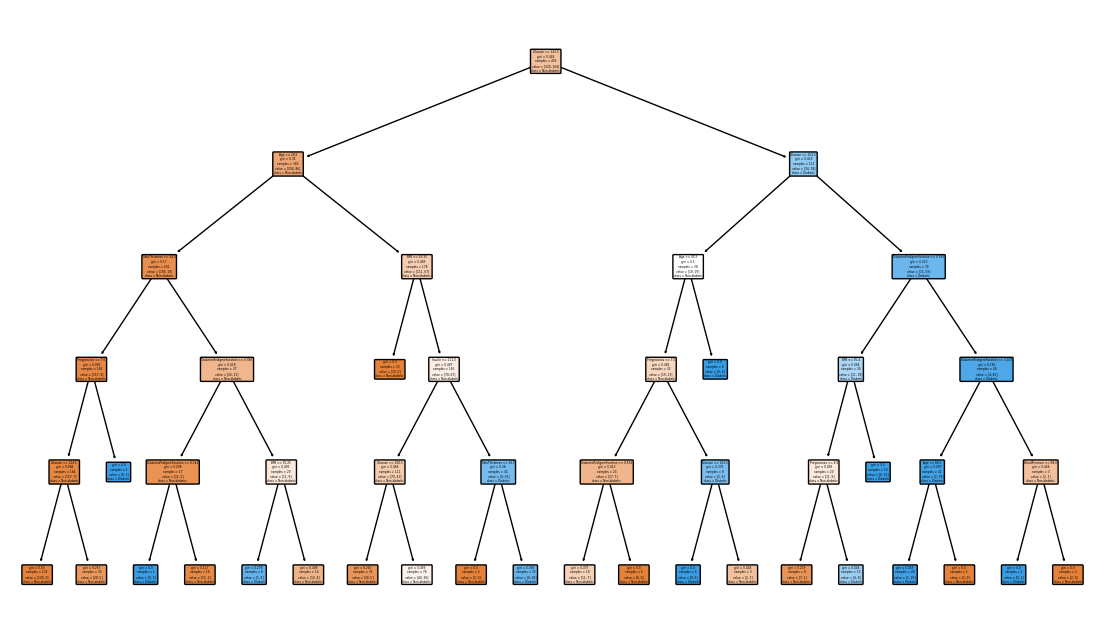

In [14]:
# Import necessary libraries
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(14, 8))
plot_tree(final_decision_tree, feature_names=X.columns, class_names=["Non-diabetic", "Diabetic"], filled=True, rounded=True)
plt.show()


In [ ]:
ans 7

Validating a decision tree model involves assessing its performance on new data or testing its robustness to changes in the dataset or environment. Sensitivity analysis and scenario testing are valuable techniques to explore uncertainty and risks. Here's how you can perform these validation steps:

Use a Validation Dataset: If possible, obtain new data that wasn't used during the model's training or testing. This new dataset can be used for validation. If new data isn't available, you can use a portion of your existing data as a hold-out validation set.

In [15]:
# Split the data into a training set, validation set, and test set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Sensitivity Analysis:

Sensitivity analysis helps assess how sensitive your model is to changes in its inputs or parameters. For a decision tree model, you can perform sensitivity analysis on variables and hyperparameters:

Vary the values of key input variables (e.g., Glucose, BMI) and observe how predictions change. This can help you understand the impact of measurement uncertainty or data variations on the model's output.
Perturb hyperparameters like max_depth or min_samples_split to see how they affect model performance. This provides insight into the model's robustness to parameter choices.
Scenario Testing:

Scenario testing involves assessing how the model performs under different scenarios or conditions. This is particularly important in healthcare, where environmental factors, patient populations, or treatment protocols may change. Some examples:

Simulate scenarios with variations in patient demographics, such as age, gender, and ethnic background, to understand how the model performs on different subpopulations.
Consider changes in healthcare practices or treatment guidelines and assess whether the model remains valid in different clinical environments.
Evaluate the model's performance in the presence of missing data or data errors, as real-world data often comes with imperfections.
Model Maintenance: Regularly reevaluate and update your model as new data becomes available. Healthcare data is dynamic, and what was valid a few years ago may not hold true today.

Cross-Validation: Repeating cross-validation on different subsets of the data can help assess the model's stability. Cross-validation also provides insights into how generalizable the model is to different folds of data.

Performance Metrics: Monitor performance metrics such as accuracy, precision, recall, and F1 score on both the validation and test datasets. Sudden drops in performance could signal issues.

External Review: In a healthcare context, consider involving domain experts, clinicians, or regulatory bodies for an external review of your model's validity, especially if it's used in critical decision-making.

By performing sensitivity analysis, scenario testing, and thorough validation with new data or robustness checks, you can gain a better understanding of your decision tree model's performance and its suitability for real-world applications.